# Big Data para Dados Públicos

##### Maciel C. Vidal

## Aula 01

A aula de hoje propõe um cenário onde apenas um analista de dados precisa estudar uma base de dados que não cabe na memória do computador, então utilizaremos:
- Nosso computador pessoal
- Ferramentas que permitem processamento paralelo
- Que não carregam todo o arquivo em memória

## Dask

Como principal solução, sugerimos a Dask (https://dask.org), uma ferramenta open-source escrita em Python (https://github.com/dask/dask), que permite análise de dados utilizando processamento paralelo.

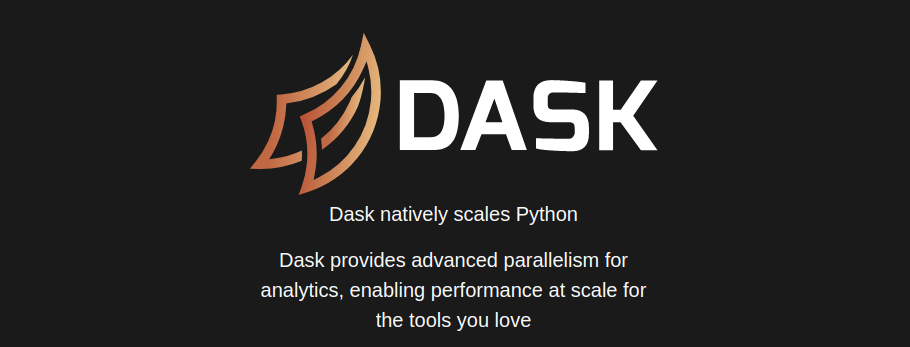

## Instalando a biblioteca *Dask*

Caso você tenha Anaconda instalado (https://www.anaconda.com/products/individual), é bem provável que o DASK já esteja disponível. Tente executar

In [1]:
!pip show dask

Name: dask
Version: 2024.8.0
Summary: Parallel PyData with Task Scheduling
Home-page: https://github.com/dask/dask/
Author: 
Author-email: 
License: BSD-3-Clause
Location: C:\Users\guoli\Documents\Insper\BigData\venv\Lib\site-packages
Requires: click, cloudpickle, fsspec, packaging, partd, pyyaml, toolz
Required-by: dask-expr, distributed


e, na hipótese da bibliteca **não ter sido encontrada**, você pode instalá-la com uma das variações:

**OBS**: preferencialmente, descomente e execute apenas a próxima célula.

In [2]:
#!pip install 'dask[complete]'

Caso tenha feito a instalação, verifique a versão com:

In [3]:
!pip show dask

Name: dask
Version: 2024.8.0
Summary: Parallel PyData with Task Scheduling
Home-page: https://github.com/dask/dask/
Author: 
Author-email: 
License: BSD-3-Clause
Location: C:\Users\guoli\Documents\Insper\BigData\venv\Lib\site-packages
Requires: click, cloudpickle, fsspec, packaging, partd, pyyaml, toolz
Required-by: dask-expr, distributed


Se o DASK já estava instalado, mas durante a aula você tiver problemas devido a versão, você pode solicitar atualização com

In [4]:
#!pip install --upgrade dask

## Importando as bibliotecas necessárias

Agora, vamos importar as bibliotecas necessárias:

In [5]:
# !pip install matplotlib

In [6]:
# Para utilizar recursos do sistema
import os
import sys

# Bibliotecas DASK
import dask
from dask.distributed import Client
import dask.dataframe as dd # similar ao pandas
import dask.multiprocessing

# Para plot
%matplotlib inline
import matplotlib.pyplot as plt

Caso obtenha algum erro, utilize o **!pip install** para instalar a biblioteca ausente!

Vamos conferir com qual versão da biblioteca **dask** estamos trabalhando?

In [7]:
dask.__version__

'2024.8.0'

In [8]:
!pip show dask

Name: dask
Version: 2024.8.0
Summary: Parallel PyData with Task Scheduling
Home-page: https://github.com/dask/dask/
Author: 
Author-email: 
License: BSD-3-Clause
Location: C:\Users\guoli\Documents\Insper\BigData\venv\Lib\site-packages
Requires: click, cloudpickle, fsspec, packaging, partd, pyyaml, toolz
Required-by: dask-expr, distributed


Você também pode conferir de onde está executando o Python e qual a versão

In [9]:
print('Executável:')
print(sys.executable)

print('\nVersão do Python:')
print(sys.version)

Executável:
c:\Users\guoli\Documents\Insper\BigData\venv\Scripts\python.exe

Versão do Python:
3.12.5 (tags/v3.12.5:ff3bc82, Aug  6 2024, 20:45:27) [MSC v.1940 64 bit (AMD64)]


Vamos conferir em qual diretório iremos trabalhar (é o diretório do notebook)

In [10]:
print('O seu notebook está na pasta:')
print(os.getcwd())

O seu notebook está na pasta:
c:\Users\guoli\Documents\Insper\BigData\Aula_01e02


## Download dos dados

Iremos trabalhar com uma amostra da base RAIS, a qual segundo o site (http://www.rais.gov.br/sitio/index.jsf) é descrita como:

"*A gestão governamental do setor do trabalho conta com o importante instrumento de coleta de dados denominado de Relação Anual de Informações Sociais - RAIS. Instituída pelo Decreto nº 76.900, de 23/12/75, a RAIS tem por objetivo:*

- *o suprimento às necessidades de controle da atividade trabalhista no País*
- *o provimento de dados para a elaboração de estatísticas do trabalho*
- *a disponibilização de informações do mercado de trabalho às entidades governamentais"*

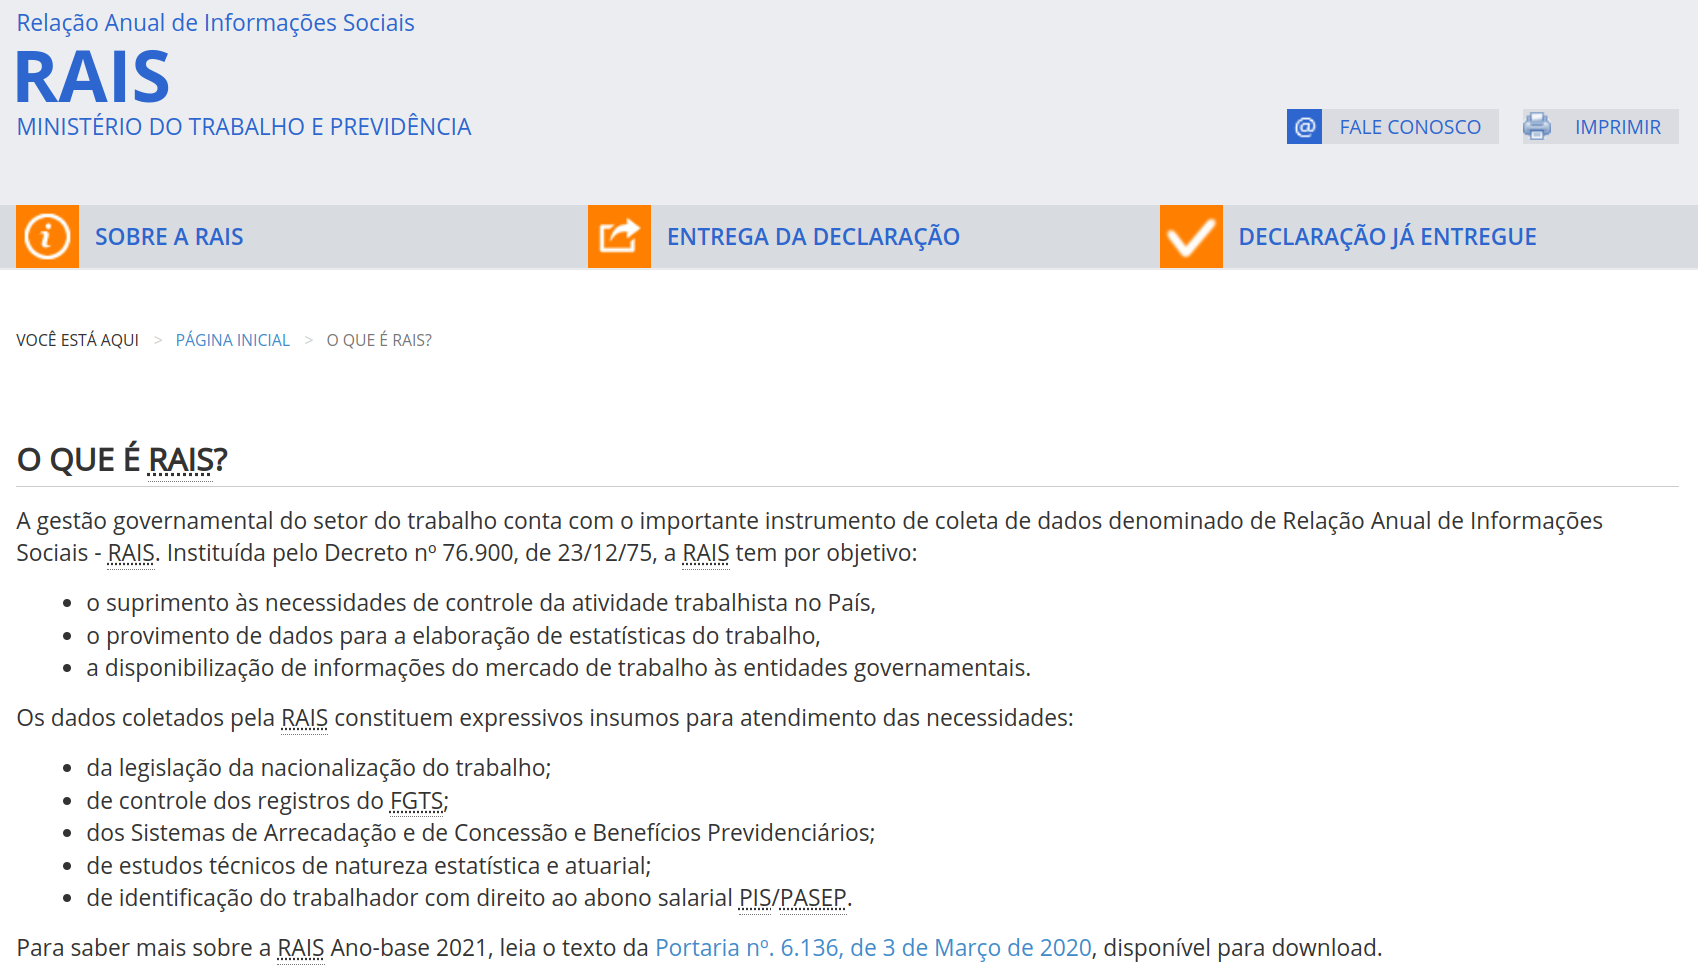

### Origem dos dados
O arquivo referente a base de 2019 do estado de São Paulo foi acessado em (ftp://ftp.mtps.gov.br/pdet/microdados/RAIS), mas sugiro utilizar as seguintes URLs para download (escolha apenas uma):

- Para formato ZIP (1,2GB): https://bigdata-22-2.s3.us-east-2.amazonaws.com/rais/RAIS_VINC_PUB_SP.zip

- Para formato TXT (9,4GB): https://bigdata-22-2.s3.us-east-2.amazonaws.com/rais/RAIS_VINC_PUB_SP.txt

- Se você quiser baixar apenas uma pequena amostra, utilize https://bigdata-22-2.s3.us-east-2.amazonaws.com/rais/amostra_sp.txt

A terceira opção seria adequada caso você não queira esperar pela completa execução dos cálculos, algo que poderá demorar alguns minutos. Assim, você terá uma ideia do funcinamento da biblioteca sem ter que utilizar uma base muito grande.

### Descompactação

Após fazer o download dos dados, descompacte (caso escolha o primeiro link) e mova-os para a mesma pasta do Jupyter Notebook. Será gerado um arquivo **RAIS_VINC_PUB_SP.txt** com **9,8GB**.

Imagem representando o conteúdo do arquivo:

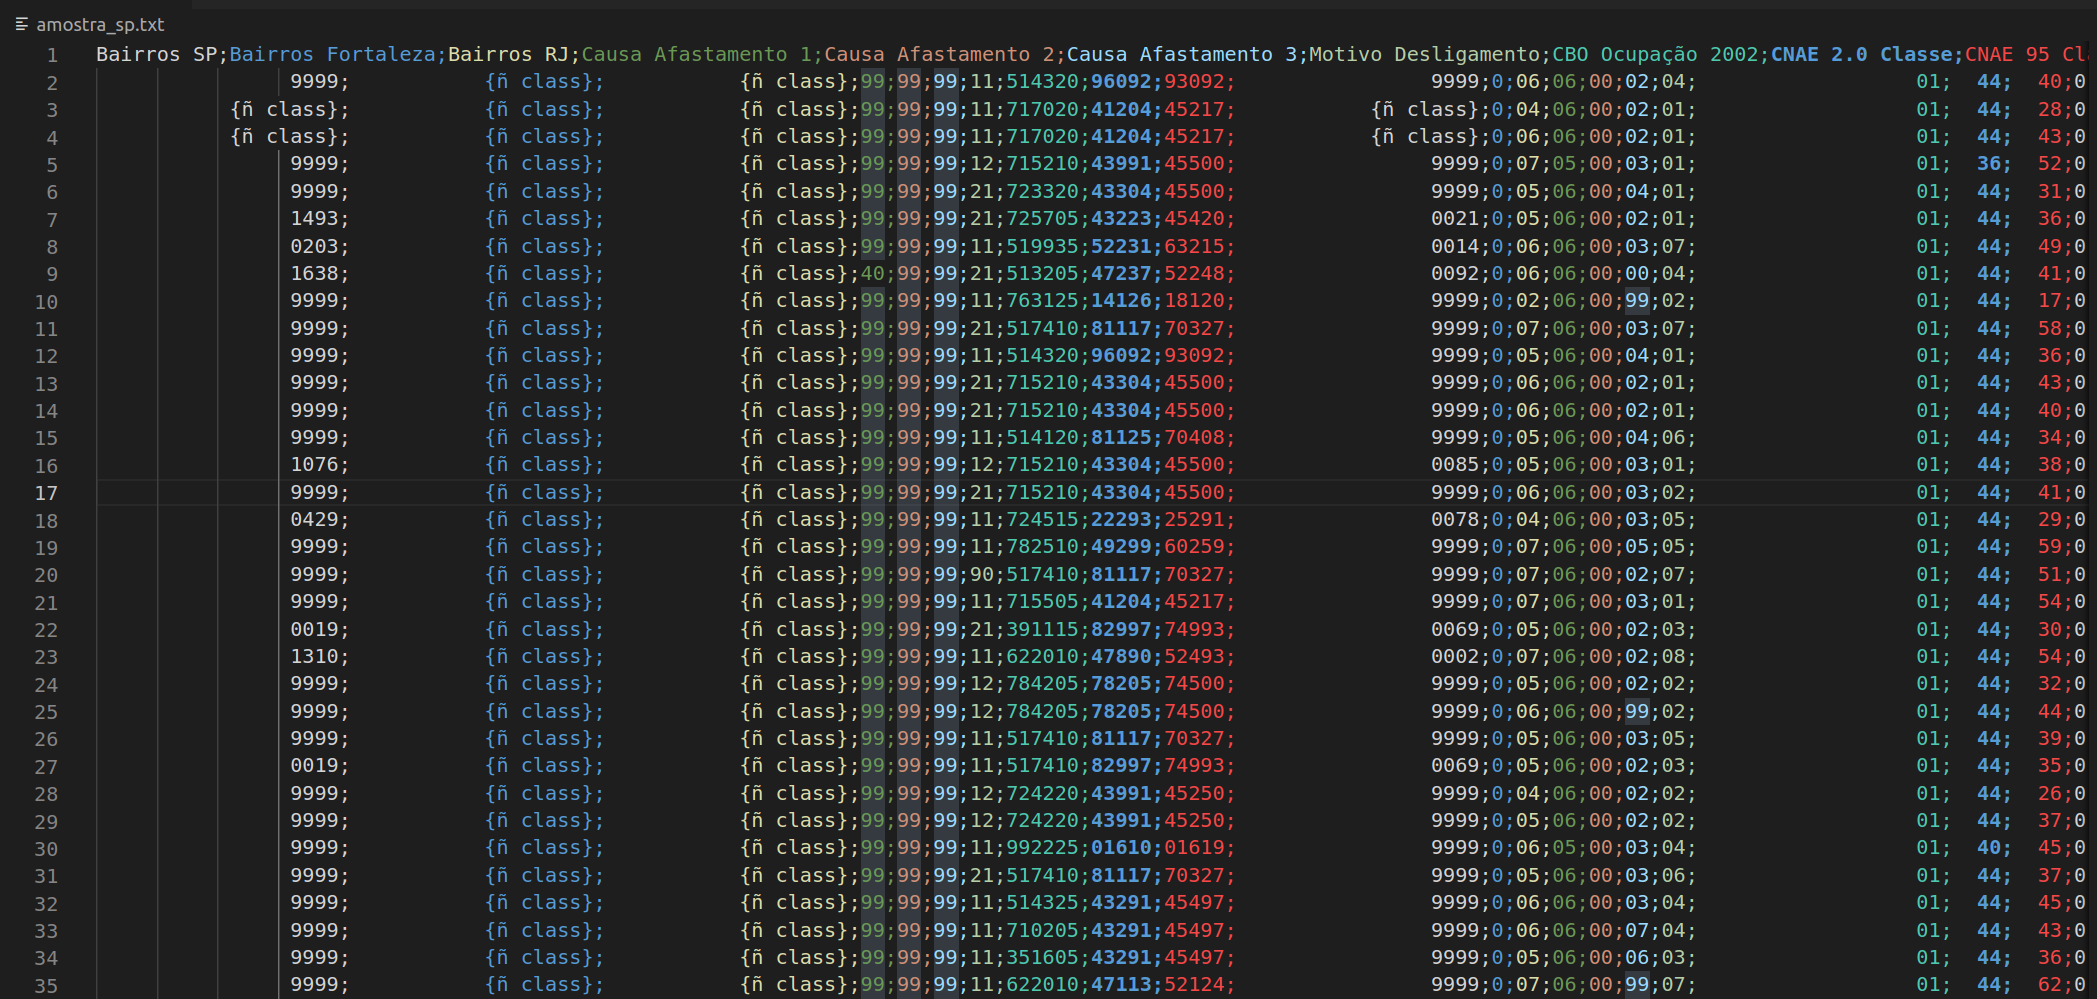

## Configurando um ambiente DASK

Agora iremos configurar um ambiente DASK para execução das nossas análises. Para isso, iremos criar um **client**

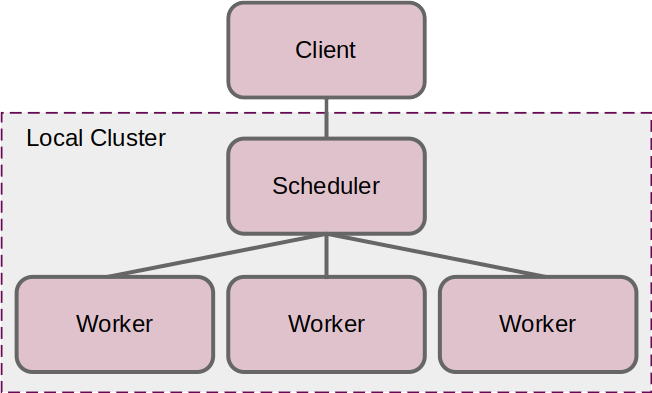

In [ ]:
client = Client(n_workers=2, threads_per_worker=1, memory_limit='1GB')

perceba que, ao exibir o client, temos acesso a uma URL que nos permitirá acompanhar informações sobre o consumo de recursos durante a execução de tarefas

In [ ]:
client

## Representação de Dados no Dask

A mais conhecida e uma das principais estruturas de dados utilizadas na área de dados é o `Pandas DataFrame`, que consisiste em um conjunto de `Pandas Series`. De forma resumida, um DataFrame consegue representar dados em forma de tabela, onde cada coluna é uma variável, semelhante a uma planilha do Excel.

Uma característica interessante do DASK é a disponibilidade do `dask.dataframe` (https://docs.dask.org/en/latest/dataframe.html). Isto nos permitirá realizar a análise dos dados utilizando uma interface que já nos seja familiar.

<img src="https://docs.dask.org/en/latest/_images/dask-dataframe.svg" width="200" height="200">

Para trabalhar com dados maiores que a memória RAM, o DASK particiona um conjunto gigante de dados em porções menores.

Obs: no início fizemos `import dask.dataframe as dd`, então utilizaremos **dd** para nos referirmos ao **dask.dataframe**.

### Lendo um Arquivo

Para leitura dos dados utilizaremos:

In [ ]:
dados_sp = # Preencha aqui!

Este comando não irá funcionar. Para corrigir, precisaremos especificar o **separador** e a **codificação**.

Perceba pela imagem que representa os dados que as colunas são separadas por ponto e vírgula, assim, precisamos especificar `sep=';'` como parâmetro na leitura dos dados.

Ainda, caso a leitura esteja sendo realizada com **UTF-8**, você precisará definir `encoding='ISO-8859-1'`.

Por fim, a leitura ficará como:

In [ ]:
dados_sp = # Preencha aqui!

## Amostra dos dados

Semelhante ao Pandas, podemos solicitar uma pequena amostra dos dados com

In [ ]:
# Preencha aqui!

Mas temos outro problema. O DASK esperava encontrar um tipo de dados em uma coluna mas encontrou um tipo de dados incompatível. Vamos corrigir isto nos próximos passos!

## Inferência do Schema

Uma das grandes desvantagens dos arquivos CSV é que não há definição de tipo dos dados das colunas. Os tipos são inferidos automaticamente pelo DASK e podem ser verificados com:

In [ ]:
# Preencha aqui!

Vamos alterar o schema inferido pelo DASK, definindo o tipo de dados da coluna na leitura dos arquivos no argumento `dtype`.

In [ ]:
# Preencha aqui!

## Amostra dos dados - nova tentativa!

Após as alterações no Schema, vamos solicitar uma pequena amostra dos dados com

In [ ]:
dados_sp.head(2)

ou então com

In [ ]:
dados_sp.tail(3)

## Quantidade de registros

Podemos contar quantas linhas estão no arquivo ao utilizar **len(dataframe)**. Antes de executar a célula, abra o **Dask Scheduler System** e monitore seu cluster enquanto o comando é executado.

**OBS**: O Link para o **Dask Scheduler System** está na célula onde criamos a variável `client`.

Ainda, perceba que utilizaremos `%%time` no início das células para termos uma ideia do tempo necessário para realizar as tarefas solicitadas!

In [ ]:
%%time
n_col = # Preencha aqui!
print(f'Temos {n_col} colunas!')

Agora vamos contar as linhas!

In [ ]:
%%time
n_linhas = # Preencha aqui!
print(f'Temos {n_linhas} linhas!')

Enquanto a célula é executada, explore o **Dask Scheduler System**.

## Experimento 1

Altere o `memory_limit`, `n_workers` e `threads_per_worker`. É possível verificar alguma diferença na performance?

**OBS:** Antes de criar um novo **client**, chame o comando `client.close()` para fechar o atual!

In [ ]:
client.close()
# Preencha aqui!

In [ ]:
%%time
n_linhas = # Preencha aqui!
print(f'Temos {n_linhas} linhas!')

## Tabelas de Frequência

Uma ferramenta bastante útil para análise univariada de variáveis categóricas é o uso de **tabelas de frequência**. Com elas, podemos descobrir quais os níveis de uma variável categórica mais frequentes nos dados, respondendo, por exemplo, quais as ocupações mais presentes na base RAIS.

No DASK, Podemos fazer isso utilizando `.value_counts()` em um DASK DataFrame. Então, crie uma tabela de frequência da coluna **CBO Ocupação 2002**.

In [ ]:
freq_cbo = # Preencha aqui!
freq_cbo

Você deve ter percebido que apenas com `.value_counts()` não obtivemos nada interessante como resposta! Isto acontece porque o cálculo foi configurado (Task Graph) porém ainda não executado/calculado.

<img src="https://docs.dask.org/en/stable/_images/dask-overview.svg">

Para obtenção dos resultados, vamos utilizar `.compute()`

In [ ]:
%%time
freq_cbo = # Preencha aqui!
freq_cbo

e então, ao conferir o tipo de dados retornado:

In [ ]:
type(freq_cbo)

Temos um `Pandas Series`, ou seja, saímos do universo DASK!

Agora vamos solicitar as top-10 ocupações mais frequentes

In [ ]:
top_10 = # Preencha aqui!
top_10

Para entender o significado destas ocupações, faça o download do arquivo https://bigdata-22-2.s3.us-east-2.amazonaws.com/rais/estrutura_cbo.zip e importe principalmente as planilhas **CBO2002 - Ocupacao.csv**, **CBO2002 - Sinonimo.csv** e **CBO2002 - PerfilOcupacional.csv**

In [ ]:
ocupacao = # Preencha aqui!

In [ ]:
ocupacao.head()

In [ ]:
ocupacao.dtypes

Como exemplo, vamos filtrar o significado da CBO `'411005'`. Precisaremos fazer um `.loc`, informando o critério de filtro nas linhas e nas colunas (nesta ordem).

**OBS**: o símbolo de dois pontos (`:`) sifnifica todas as linhas (ou colunas, dependendo se é utilizado antes ou após a vírgula).

In [ ]:
# Preencha aqui!

vamos conferir novamente o tipo de `top_10` e transformá-lo para `Pandas DataFrame`

In [ ]:
type(top_10)

In [ ]:
top_10 = # Preencha aqui!
top_10

In [ ]:
type(top_10)

In [ ]:
top_10.columns = ['Qtde']
top_10

Vamos definir a coluna `'CODIGO'` como index da ocupação

In [ ]:
ocupacao = # Preencha aqui!
ocupacao

In [ ]:
type(ocupacao)

E Fazer um `.join()`, conectando cada registro do DataFrame `top_10` com a sua explicação no DataFrame `ocupacao`.

In [ ]:
top_10 = # Preencha aqui!
top_10

## Gráficos com `matplotlib` e `plotly`

Vamos construir um gráfico de barras utilizando `matplotlib`

In [ ]:
# Preencha aqui!

Para uma melhor visualização, faça um gráfico de barras utilizando a biblioteca **plotly express** (https://plotly.com/python/bar-charts/)

Vamos instalar a biblioteca

In [ ]:
!pip install plotly.express nbformat

Importar e gerar um gráfico de barras

In [ ]:
import plotly.express as px

fig = # Preencha aqui!
fig.show()

## Exercício 1

Procure na página de exemplos https://plotly.com/python/bar-charts/ como alterar o título de um gráfico e o label do eixo x.

Após configurar título e label do eixo x, descubra como deixar a cor da barra em função da frequência da ocupação.

In [ ]:
# Preencha aqui!

## Experimento 2

Calcule a média da coluna **Vl Rem Novembro CC**.

Mas antes:
- Verifique o tipo de dados da coluna. Será necessária alguma alteração? Você precisará transformar um valor numérico que está como texto para o padrão americano, convertendo-o então para float.


In [ ]:
# Preencha aqui!

In [ ]:
%%time
# Preencha aqui!

## Exercício 2

Calcule as demais medidas de interesse (desvio padrão, primeiro quartil, mediana, terceiro quartil, etc.) da coluna **Vl Rem Novembro CC**.

In [ ]:
%%time
# Preencha aqui!

## Exercício 3

Calcule as medidas resumo (média, desvio padrão, primeiro quartil, mediana, terceiro quartil) das colunas `Vl Rem Agosto CC`, `Vl Rem Setembro CC` e `Vl Rem Outubro CC`.

Você conseguiria fazer sem copiar e colar o código três vezes?!

In [ ]:
%%time
# Preencha aqui!